<a href="https://colab.research.google.com/github/Chris-Congleton/MSc-Thesis/blob/main/Volkskrant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json, os
import pandas as pd
import nltk
import glob
from tqdm import tqdm
nltk.download('punkt')
import seaborn as sns
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls gdrive/MyDrive/CS/Thesis/volkskrant-nl/

In [ ]:
df = pd.read_json('gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-01.json')
print(df.columns)
print(df.head())

Index(['categories', 'cleaned', 'cleantext', 'keywords', 'leading-image',
       'leading-image-caption-content', 'leading-image-caption-source',
       'leading-image-copyright', 'og-description', 'og-image', 'og-title',
       'timestamp', 'title', 'url'],
      dtype='object')
                 categories  ...                                                url
0  Nieuws &amp; Achtergrond  ...  https://www.volkskrant.nl/nieuws-achtergrond/a...
1  Nieuws &amp; Achtergrond  ...  https://www.volkskrant.nl/nieuws-achtergrond/c...
2  Nieuws &amp; Achtergrond  ...  https://www.volkskrant.nl/nieuws-achtergrond/o...
3  Nieuws &amp; Achtergrond  ...  https://www.volkskrant.nl/nieuws-achtergrond/k...
4  Nieuws &amp; Achtergrond  ...  https://www.volkskrant.nl/nieuws-achtergrond/h...

[5 rows x 14 columns]


In [ ]:
path_to_json = "gdrive/MyDrive/CS/Thesis/volkskrant-nl"
json_files = ["gdrive/MyDrive/CS/Thesis/volkskrant-nl/"+pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files[:10])

['gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-01.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-02.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-03.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-04.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-05.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-06.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-07.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-08.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-09.json', 'gdrive/MyDrive/CS/Thesis/volkskrant-nl/volkskrant-nl-2002-10.json']


In [ ]:
def readFiles(file_names):
  dfs = [] # an empty list to store the data frames
  for f in tqdm(file_names):
    data = pd.read_json(f) # read data frame from json file
    dfs.append(data) # append the data frame to the list

  df = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.
  return df

In [ ]:
df = readFiles(json_files)
df.shape

100%|██████████| 214/214 [01:12<00:00,  2.95it/s]


(862852, 14)

In [ ]:
df.head()

,categories,cleaned,cleantext,keywords,leading-image,leading-image-caption-content,leading-image-caption-source,leading-image-copyright,og-description,og-image,og-title,timestamp,title,url
0,Nieuws &amp; Achtergrond,2019-10-16T20:16:07.606000,Beeld ANP Dinsdag begint de dag overal bewolkt...,"[weer, weersvoorspelling]",https://images4.persgroep.net/rcs/6j_4vnkesFV2...,None,Beeld ANP,Beeld ANP,Dinsdag begint de dag overal bewolkt. Vooral i...,https://images4.persgroep.net/rcs/6j_4vnkesFV2...,Het weerbericht voor dinsdag: veel regen met l...,2019-10-01 00:00:23,Het weerbericht voor dinsdag: veel regen met l...,https://www.volkskrant.nl/nieuws-achtergrond/h...
1,Cultuur &amp; Media,2019-10-16T20:16:07.899000,Kevin Spacey en Annette Bening in American Bea...,"[Asli Özge, Jane, kunst, cultuur en entertainm...",https://images3.persgroep.net/rcs/_My6hvlnyfmG...,Kevin Spacey en Annette Bening in American Beauty,,,Elke dag tipt de redactie van de Volkskrant de...,https://images3.persgroep.net/rcs/_My6hvlnyfmG...,De Volkskrant film- en tv-tips voor dinsdag 1 ...,2019-10-01 03:00:29,De Volkskrant film- en tv-tips voor dinsdag 1 ...,https://www.volkskrant.nl/cultuur-media/de-vol...
2,Nieuws &amp; Achtergrond,2019-10-16T20:16:08.211000,"Minister Carola Schouten (Landbouw, Natuur en ...","[Platform Medezeggenschap MBO, onderwijs en op...",https://images4.persgroep.net/rcs/ztZTAtf2q4AU...,"Minister Carola Schouten (Landbouw, Natuur en ...",Beeld ANP,Beeld ANP,Ondanks goede voornemens en extra geld is het ...,https://images4.persgroep.net/rcs/ztZTAtf2q4AU...,Aantal mbo-docenten in laagste salarisschaal g...,2019-10-01 03:00:29,Aantal mbo-docenten in laagste salarisschaal g...,https://www.volkskrant.nl/nieuws-achtergrond/a...
3,Nieuws &amp; Achtergrond,2019-10-16T20:16:08.507000,Beeld ANP Meer dan de helft van de werkzoekend...,"[UWV, Astrid Hendriks, werk, politiek, economi...",https://images4.persgroep.net/rcs/L-Pci8qLKG_M...,None,Beeld ANP,Beeld ANP,Een databank van het UWV die mensen met een ar...,https://images4.persgroep.net/rcs/L-Pci8qLKG_M...,UWV-databank voor mensen met arbeidshandicap h...,2019-10-01 05:20:00,UWV-databank voor mensen met arbeidshandicap h...,https://www.volkskrant.nl/nieuws-achtergrond/u...
4,Nieuws &amp; Achtergrond,2019-10-16T20:16:08.846000,"Minister Carola Schouten (Landbouw, Natuur en ...","[China, politiek, Stef Blok, Trump, André Rieu...",https://images4.persgroep.net/rcs/ztZTAtf2q4AU...,"Minister Carola Schouten (Landbouw, Natuur en ...",Beeld ANP,Beeld ANP,Aantal mbo-docenten in laagste salarisschaal g...,https://images4.persgroep.net/rcs/ztZTAtf2q4AU...,Volkskrant Ochtend: Aantal mbo-docenten in laa...,2019-10-01 05:21:23,Volkskrant Ochtend: Aantal mbo-docenten in laa...,https://www.volkskrant.nl/nieuws-achtergrond/v...


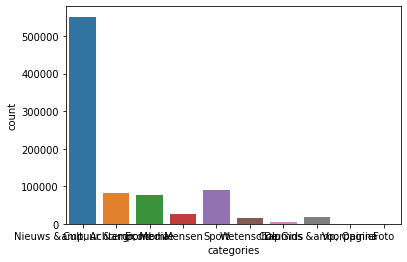

In [ ]:
ax = sns.countplot(x="categories",data=df)

In [ ]:
partijen = ["CDA", "VVD", "D66", "PvdA"]

In [ ]:
def occurence(text, words):
  